In [1]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy import stats

# movie_gross 

In [2]:
movie_gross = pd.read_csv('../../data/zippedData/bom.movie_gross.csv.gz')
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


movie_gross Data Cleaning

In [4]:
#movie_gross['foreign_gross']= movie_gross['foreign_gross'].str.replace(',','')
#movie_gross['domestic_gross'] = pd.to_numeric(movie_gross['domestic_gross'])
#movie_gross['foreign_gross'] = pd.to_numeric(movie_gross['foreign_gross'])
#movie_gross['domestic_gross'] = movie_gross['domestic_gross'].fillna(movie_gross['domestic_gross'].median())
#movie_gross['foreign_gross'] = movie_gross['foreign_gross'].fillna(movie_gross['foreign_gross'].median())
#movie_gross = movie_gross.dropna()

# im.db zip

In [5]:
conn = sqlite3.Connection('../../data/zippedData/im.db')

In [6]:
print(conn)

In [7]:
imbd = pd.read_sql("""
SELECT DISTINCT mb.primary_title, mb.genres,  p.primary_name as director
FROM movie_basics as mb,
directors as d on d.movie_id = mb.movie_id,
persons as p on d.person_id = p.person_id
; """, conn)
imbd

,primary_title,genres,director
0,Sunghursh,"Action,Crime,Drama",Harnam Singh Rawail
1,One Day Before the Rainy Season,"Biography,Drama",Mani Kaul
2,The Other Side of the Wind,Drama,Orson Welles
3,Sabse Bada Sukh,"Comedy,Drama",Hrishikesh Mukherjee
4,The Wandering Soap Opera,"Comedy,Drama,Fantasy",Raoul Ruiz
...,...,...,...
163103,Rodolpho Teóphilo - O Legado de um Pioneiro,Documentary,Ana Célia de Oliveira
163104,Dankyavar Danka,Comedy,Kanchan Nayak
163105,6 Gunn,None,Kiran Gawade
163106,Chico Albuquerque - Revelações,Documentary,Vinicius Augusto Bozzo


# movie_info 

In [8]:
movie_info = pd.read_csv('../../data/zippedData/rt.movie_info.tsv.gz', sep = '\t')
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [9]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


Checking for null values

In [10]:
movie_info.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [11]:
genre = movie_info.loc[(movie_info['genre'].str.contains('Drama')) & (movie_info['director'].count() > 14) , ['genre', 'rating', 'director', 'writer']]
genre

,genre,rating,director,writer
0,Action and Adventure|Classics|Drama,R,William Friedkin,Ernest Tidyman
1,Drama|Science Fiction and Fantasy,R,David Cronenberg,David Cronenberg|Don DeLillo
2,Drama|Musical and Performing Arts,R,Allison Anders,Allison Anders
3,Drama|Mystery and Suspense,R,Barry Levinson,Paul Attanasio|Michael Crichton
4,Drama|Romance,NR,Rodney Bennett,Giles Cooper
...,...,...,...,...
1551,Action and Adventure|Drama,R,Rick Rubin,Rick Rubin|Ric Menello
1552,Comedy|Drama,R,Joel Coen,Joel Coen|Ethan Coen
1557,Classics|Comedy|Drama|Musical and Performing Arts,G,Gordon Douglas,NaN
1558,Comedy|Drama|Kids and Family|Sports and Fitness,PG,David Mickey Evans,David Mickey Evans|Robert Gunter


In [12]:
directors = movie_info.groupby(['director']).size()
directors.sort_values(ascending=False)

director
Steven Spielberg    10
Clint Eastwood       8
Barry Levinson       4
Curtis Hanson        4
William Beaudine     4
                    ..
Mike Binder          1
Mike Barker          1
Miguel Arteta        1
Mickey Keating       1
Justin Lin           1
Length: 1125, dtype: int64

In [13]:
genres = movie_info.groupby(['genre']).size()
genres.sort_values(ascending=False)

genre
Drama                                                        151
Comedy                                                       110
Comedy|Drama                                                  80
Drama|Mystery and Suspense                                    67
Art House and International|Drama                             62
                                                            ... 
Art House and International|Comedy|Drama|Gay and Lesbian       1
Drama|Musical and Performing Arts|Special Interest             1
Art House and International|Comedy|Documentary|Television      1
Comedy|Drama|Faith and Spirituality                            1
Art House and International|Classics|Horror                    1
Length: 299, dtype: int64

Visualization

<AxesSubplot:>

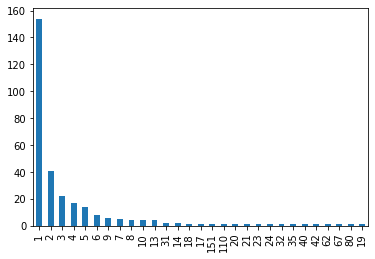

In [14]:
genres.value_counts().plot(kind='bar')

# movie_reviews

In [15]:
movie_reviews = pd.read_table('../../data/zippedData/rt.reviews.tsv.gz', sep='\t', encoding='unicode_escape')
movie_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


# movies csv

In [16]:
import pandas as pd
tmdb_movie = pd.read_csv('../../data/zippedData/tmdb.movies.csv.gz')
tmdb_movie.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [17]:
tmdb_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [18]:
tmdb_movie.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [19]:
score = tmdb_movie[['title','popularity','vote_count', 'vote_average']]
score.head()

,title,popularity,vote_count,vote_average
0,Harry Potter and the Deathly Hallows: Part 1,33.533,10788,7.7
1,How to Train Your Dragon,28.734,7610,7.7
2,Iron Man 2,28.515,12368,6.8
3,Toy Story,28.005,10174,7.9
4,Inception,27.920,22186,8.3


<AxesSubplot:>

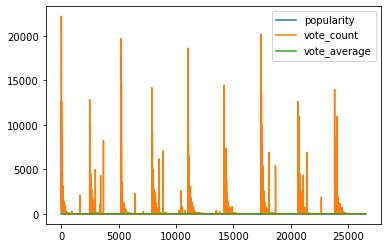

In [20]:
score.plot()

# movie_budgets

In [21]:
import pandas as pd
movie_budget = pd.read_csv('../../data/zippedData/tn.movie_budgets.csv.gz')
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [22]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [23]:
movie_budget.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [24]:
budget = movie_budget[['movie','production_budget','domestic_gross', 'worldwide_gross']]
budget.head()

,movie,production_budget,domestic_gross,worldwide_gross
0,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# Joins

In [25]:
joins = movie_budget.set_index('movie').join(imbd.set_index('primary_title'), how='inner')
joins.reset_index(inplace=True)
joins.groupby('id').first()
joins

,index,id,release_date,production_budget,domestic_gross,worldwide_gross,genres,director
0,#Horror,16,"Nov 20, 2015","$1,500,000",$0,$0,"Crime,Drama,Horror",Tara Subkoff
1,10 Cloverfield Lane,54,"Mar 11, 2016","$5,000,000","$72,082,999","$108,286,422","Drama,Horror,Mystery",Dan Trachtenberg
2,10 Days in a Madhouse,48,"Nov 11, 2015","$12,000,000","$14,616","$14,616",Drama,Timothy Hines
3,12 Rounds,37,"Mar 27, 2009","$20,000,000","$12,234,694","$17,306,648","Action,Drama,Romance",Gabriel Soriano
4,12 Strong,64,"Jan 19, 2018","$35,000,000","$45,819,713","$71,118,378","Action,Drama,History",Nicolai Fuglsig
...,...,...,...,...,...,...,...,...
4162,Zootopia,57,"Mar 4, 2016","$150,000,000","$341,268,248","$1,019,429,616","Adventure,Animation,Comedy",Byron Howard
4163,Zootopia,57,"Mar 4, 2016","$150,000,000","$341,268,248","$1,019,429,616","Adventure,Animation,Comedy",Rich Moore
4164,Zootopia,57,"Mar 4, 2016","$150,000,000","$341,268,248","$1,019,429,616","Adventure,Animation,Comedy",Jared Bush
4165,Zulu,82,"Dec 31, 2013","$16,000,000",$0,"$1,844,228","Crime,Drama,Thriller",Jérôme Salle


In [26]:
joins = joins.groupby('index').nth(0)
joins

,id,release_date,production_budget,domestic_gross,worldwide_gross,genres,director
index,,,,,,,
#Horror,16,"Nov 20, 2015","$1,500,000",$0,$0,"Crime,Drama,Horror",Tara Subkoff
10 Cloverfield Lane,54,"Mar 11, 2016","$5,000,000","$72,082,999","$108,286,422","Drama,Horror,Mystery",Dan Trachtenberg
10 Days in a Madhouse,48,"Nov 11, 2015","$12,000,000","$14,616","$14,616",Drama,Timothy Hines
12 Rounds,37,"Mar 27, 2009","$20,000,000","$12,234,694","$17,306,648","Action,Drama,Romance",Gabriel Soriano
12 Strong,64,"Jan 19, 2018","$35,000,000","$45,819,713","$71,118,378","Action,Drama,History",Nicolai Fuglsig
...,...,...,...,...,...,...,...
Zoolander 2,64,"Feb 12, 2016","$50,000,000","$28,848,693","$55,348,693",Comedy,Ben Stiller
Zoom,26,"Aug 11, 2006","$35,000,000","$11,989,328","$12,506,188","Animation,Comedy,Drama",Pedro Morelli
Zootopia,57,"Mar 4, 2016","$150,000,000","$341,268,248","$1,019,429,616","Adventure,Animation,Comedy",Byron Howard


In [27]:
joins['genres'] = joins['genres'].str.split(",")
joins['genres'] = joins['genres'].fillna('Unknown')
for x in range(joins['genres'].count()):
    if joins['genres'][x] == 'Unknown':
        joins['genres'][x] = 'Unknown'
    else:
        joins['genres'][x] = joins['genres'][x][0]
        x +=1
joins

<ipython-input-27-608fd6d50ce4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joins['genres'][x] = joins['genres'][x][0]
<ipython-input-27-608fd6d50ce4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joins['genres'][x] = 'Unknown'


,id,release_date,production_budget,domestic_gross,worldwide_gross,genres,director
index,,,,,,,
#Horror,16,"Nov 20, 2015","$1,500,000",$0,$0,Crime,Tara Subkoff
10 Cloverfield Lane,54,"Mar 11, 2016","$5,000,000","$72,082,999","$108,286,422",Drama,Dan Trachtenberg
10 Days in a Madhouse,48,"Nov 11, 2015","$12,000,000","$14,616","$14,616",Drama,Timothy Hines
12 Rounds,37,"Mar 27, 2009","$20,000,000","$12,234,694","$17,306,648",Action,Gabriel Soriano
12 Strong,64,"Jan 19, 2018","$35,000,000","$45,819,713","$71,118,378",Action,Nicolai Fuglsig
...,...,...,...,...,...,...,...
Zoolander 2,64,"Feb 12, 2016","$50,000,000","$28,848,693","$55,348,693",Comedy,Ben Stiller
Zoom,26,"Aug 11, 2006","$35,000,000","$11,989,328","$12,506,188",Animation,Pedro Morelli
Zootopia,57,"Mar 4, 2016","$150,000,000","$341,268,248","$1,019,429,616",Adventure,Byron Howard


In [28]:
joins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2298 entries, #Horror to xXx: Return of Xander Cage
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 2298 non-null   int64 
 1   release_date       2298 non-null   object
 2   production_budget  2298 non-null   object
 3   domestic_gross     2298 non-null   object
 4   worldwide_gross    2298 non-null   object
 5   genres             2298 non-null   object
 6   director           2298 non-null   object
dtypes: int64(1), object(6)
memory usage: 223.6+ KB


In [29]:
joins['domestic_gross']= joins['domestic_gross'].str.replace(',','')
joins['domestic_gross']= joins['domestic_gross'].str.replace('$','')
joins['domestic_gross'] = pd.to_numeric(joins['domestic_gross'])
joins['worldwide_gross']= joins['worldwide_gross'].str.replace(',','')
joins['worldwide_gross']= joins['worldwide_gross'].str.replace('$','')
joins['worldwide_gross'] = pd.to_numeric(joins['worldwide_gross'])
joins['production_budget']= joins['production_budget'].str.replace(',','')
joins['production_budget']= joins['production_budget'].str.replace('$','')
joins['production_budget'] = pd.to_numeric(joins['production_budget'])

In [30]:
joins

,id,release_date,production_budget,domestic_gross,worldwide_gross,genres,director
index,,,,,,,
#Horror,16,"Nov 20, 2015",1500000,0,0,Crime,Tara Subkoff
10 Cloverfield Lane,54,"Mar 11, 2016",5000000,72082999,108286422,Drama,Dan Trachtenberg
10 Days in a Madhouse,48,"Nov 11, 2015",12000000,14616,14616,Drama,Timothy Hines
12 Rounds,37,"Mar 27, 2009",20000000,12234694,17306648,Action,Gabriel Soriano
12 Strong,64,"Jan 19, 2018",35000000,45819713,71118378,Action,Nicolai Fuglsig
...,...,...,...,...,...,...,...
Zoolander 2,64,"Feb 12, 2016",50000000,28848693,55348693,Comedy,Ben Stiller
Zoom,26,"Aug 11, 2006",35000000,11989328,12506188,Animation,Pedro Morelli
Zootopia,57,"Mar 4, 2016",150000000,341268248,1019429616,Adventure,Byron Howard


In [31]:
joins['profit'] = joins['worldwide_gross'] - joins['production_budget']

In [32]:
joins = joins.sort_values('profit', ascending=False)
joins

,id,release_date,production_budget,domestic_gross,worldwide_gross,genres,director,profit
index,,,,,,,,
Avatar,1,"Dec 18, 2009",425000000,760507625,2776345279,Horror,Atsushi Wada,2351345279
Titanic,43,"Dec 19, 1997",200000000,659363944,2208208395,Adventure,Pete Meads,2008208395
Avengers: Infinity War,7,"Apr 27, 2018",300000000,678815482,2048134200,Action,Anthony Russo,1748134200
Jurassic World,34,"Jun 12, 2015",215000000,652270625,1648854864,Action,Colin Trevorrow,1433854864
Furious 7,67,"Apr 3, 2015",190000000,353007020,1518722794,Action,James Wan,1328722794
...,...,...,...,...,...,...,...,...
Call of the Wild,36,"Feb 21, 2020",82000000,0,0,Adventure,Chris Sanders,-82000000
Bright,80,"Dec 13, 2017",90000000,0,0,Action,David Ayer,-90000000
Men in Black: International,42,"Jun 14, 2019",110000000,3100000,3100000,Action,F. Gary Gray,-106900000


In [33]:
joins['genres'].value_counts()

Action         539
Drama          494
Comedy         415
Adventure      200
Biography      149
Horror         137
Documentary    129
Crime          120
Thriller        31
Animation       21
Unknown         12
Sci-Fi           9
Fantasy          8
Mystery          7
Family           7
Romance          5
Musical          4
Music            4
War              3
Western          2
Sport            2
Name: genres, dtype: int64

In [34]:
joins['director'].value_counts()

Steven Spielberg      8
Clint Eastwood        6
Steven Soderbergh     6
David Gordon Green    6
Denis Villeneuve      6
                     ..
Hank Braxtan          1
Garry Marshall        1
Hyung-rae Shim        1
Mark Romanek          1
Todd Rodgers          1
Name: director, Length: 1783, dtype: int64

In [35]:
joins = joins.sort_values('profit', ascending=False)
joins

,id,release_date,production_budget,domestic_gross,worldwide_gross,genres,director,profit
index,,,,,,,,
Avatar,1,"Dec 18, 2009",425000000,760507625,2776345279,Horror,Atsushi Wada,2351345279
Titanic,43,"Dec 19, 1997",200000000,659363944,2208208395,Adventure,Pete Meads,2008208395
Avengers: Infinity War,7,"Apr 27, 2018",300000000,678815482,2048134200,Action,Anthony Russo,1748134200
Jurassic World,34,"Jun 12, 2015",215000000,652270625,1648854864,Action,Colin Trevorrow,1433854864
Furious 7,67,"Apr 3, 2015",190000000,353007020,1518722794,Action,James Wan,1328722794
...,...,...,...,...,...,...,...,...
Call of the Wild,36,"Feb 21, 2020",82000000,0,0,Adventure,Chris Sanders,-82000000
Bright,80,"Dec 13, 2017",90000000,0,0,Action,David Ayer,-90000000
Men in Black: International,42,"Jun 14, 2019",110000000,3100000,3100000,Action,F. Gary Gray,-106900000


<AxesSubplot:xlabel='production_budget', ylabel='director'>

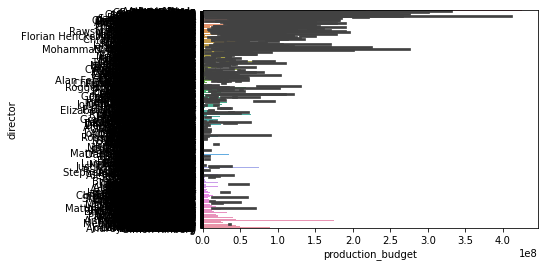

In [36]:
sns.barplot(data=joins, x='production_budget', y='director')

C:\Users\colbritt\Anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='production_budget', ylabel='profit'>

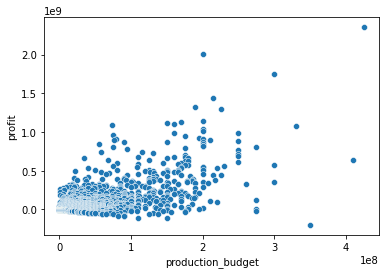

In [37]:
sns.scatterplot(joins['production_budget'], joins['profit'])
#sns.set(rc={'figure.figsize':(11.7,8.27)})

C:\Users\colbritt\Anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='profit', ylabel='production_budget'>

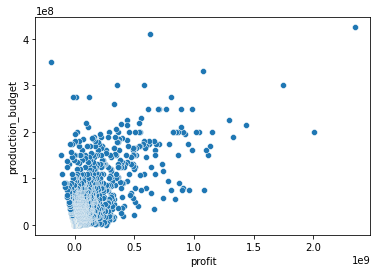

In [38]:
sns.scatterplot(joins['profit'], joins['production_budget'])
#sns.set(rc={'figure.figsize':(100,25)})

In [47]:
limiter = joins.copy()
limiter['production_budget'].median()
limiter_test = limiter.loc[limiter['production_budget'] >= 18000000]
limiter_test

,id,release_date,production_budget,domestic_gross,worldwide_gross,genres,director,profit
index,,,,,,,,
Avatar,1,"Dec 18, 2009",425000000,760507625,2776345279,Horror,Atsushi Wada,2351345279
Titanic,43,"Dec 19, 1997",200000000,659363944,2208208395,Adventure,Pete Meads,2008208395
Avengers: Infinity War,7,"Apr 27, 2018",300000000,678815482,2048134200,Action,Anthony Russo,1748134200
Jurassic World,34,"Jun 12, 2015",215000000,652270625,1648854864,Action,Colin Trevorrow,1433854864
Furious 7,67,"Apr 3, 2015",190000000,353007020,1518722794,Action,James Wan,1328722794
...,...,...,...,...,...,...,...,...
Call of the Wild,36,"Feb 21, 2020",82000000,0,0,Adventure,Chris Sanders,-82000000
Bright,80,"Dec 13, 2017",90000000,0,0,Action,David Ayer,-90000000
Men in Black: International,42,"Jun 14, 2019",110000000,3100000,3100000,Action,F. Gary Gray,-106900000


In [51]:
limiter_test['production_budget'].median()
limiter_test2 = limiter_test.loc[limiter_test['production_budget'] >= 42000000]
limiter_test2

,id,release_date,production_budget,domestic_gross,worldwide_gross,genres,director,profit
index,,,,,,,,
Avatar,1,"Dec 18, 2009",425000000,760507625,2776345279,Horror,Atsushi Wada,2351345279
Titanic,43,"Dec 19, 1997",200000000,659363944,2208208395,Adventure,Pete Meads,2008208395
Avengers: Infinity War,7,"Apr 27, 2018",300000000,678815482,2048134200,Action,Anthony Russo,1748134200
Jurassic World,34,"Jun 12, 2015",215000000,652270625,1648854864,Action,Colin Trevorrow,1433854864
Furious 7,67,"Apr 3, 2015",190000000,353007020,1518722794,Action,James Wan,1328722794
...,...,...,...,...,...,...,...,...
Call of the Wild,36,"Feb 21, 2020",82000000,0,0,Adventure,Chris Sanders,-82000000
Bright,80,"Dec 13, 2017",90000000,0,0,Action,David Ayer,-90000000
Men in Black: International,42,"Jun 14, 2019",110000000,3100000,3100000,Action,F. Gary Gray,-106900000


C:\Users\colbritt\Anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


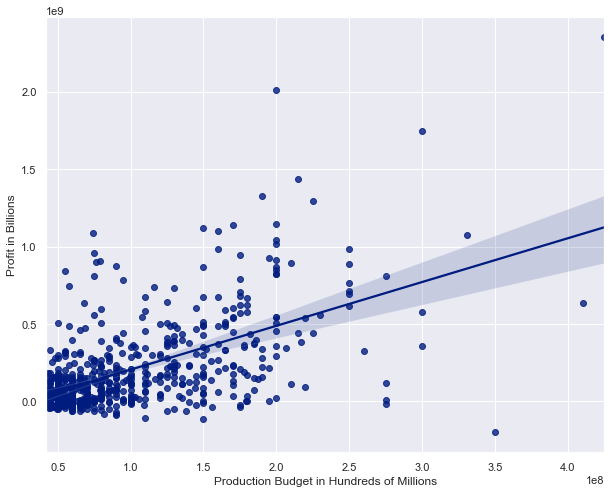

In [76]:
#Use formatter to switch to millions
plt.figure(figsize = (10,8))
sns.regplot(limiter_test2['production_budget'], limiter_test2['profit'])
plt.xlabel('Production Budget in Hundreds of Millions')
plt.ylabel('Profit in Billions')
sns.set_theme(palette = 'dark')

In [104]:
test = joins
# apply normalization techniques
for column in test:
    test[column] = test['profit']  / test['production_budget'].abs().max()
      
# view normalized data
display(test)

,id,release_date,production_budget,domestic_gross,worldwide_gross,genres,director,profit
index,,,,,,,,
Avatar,5.532577,5.532577,5.532577,4.250000e+08,4.250000e+08,4.250000e+08,4.250000e+08,4.250000e+08
Titanic,4.725196,4.725196,4.725196,3.629788e+08,3.629788e+08,3.629788e+08,3.629788e+08,3.629788e+08
Avengers: Infinity War,4.113257,4.113257,4.113257,3.159710e+08,3.159710e+08,3.159710e+08,3.159710e+08,3.159710e+08
Jurassic World,3.373776,3.373776,3.373776,2.591658e+08,2.591658e+08,2.591658e+08,2.591658e+08,2.591658e+08
Furious 7,3.126407,3.126407,3.126407,2.401634e+08,2.401634e+08,2.401634e+08,2.401634e+08,2.401634e+08
...,...,...,...,...,...,...,...,...
Call of the Wild,-0.192941,-0.192941,-0.192941,-1.482130e+07,-1.482130e+07,-1.482130e+07,-1.482130e+07,-1.482130e+07
Bright,-0.211765,-0.211765,-0.211765,-1.626728e+07,-1.626728e+07,-1.626728e+07,-1.626728e+07,-1.626728e+07
Men in Black: International,-0.251529,-0.251529,-0.251529,-1.932192e+07,-1.932192e+07,-1.932192e+07,-1.932192e+07,-1.932192e+07


In [40]:
sns.regplot(test['profit'], test['production_budget'])

NameError: name 'test' is not defined

In [113]:
slope, intercept, r_value, p_value, std_err = stats.linregress(test['profit'], test['production_budget'])
slope
intercept
print('y = ', slope, '* x + ', intercept)

y =  1.3017828534256052e-08 * x +  5.551115123125783e-17


C:\Users\colbritt\Anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


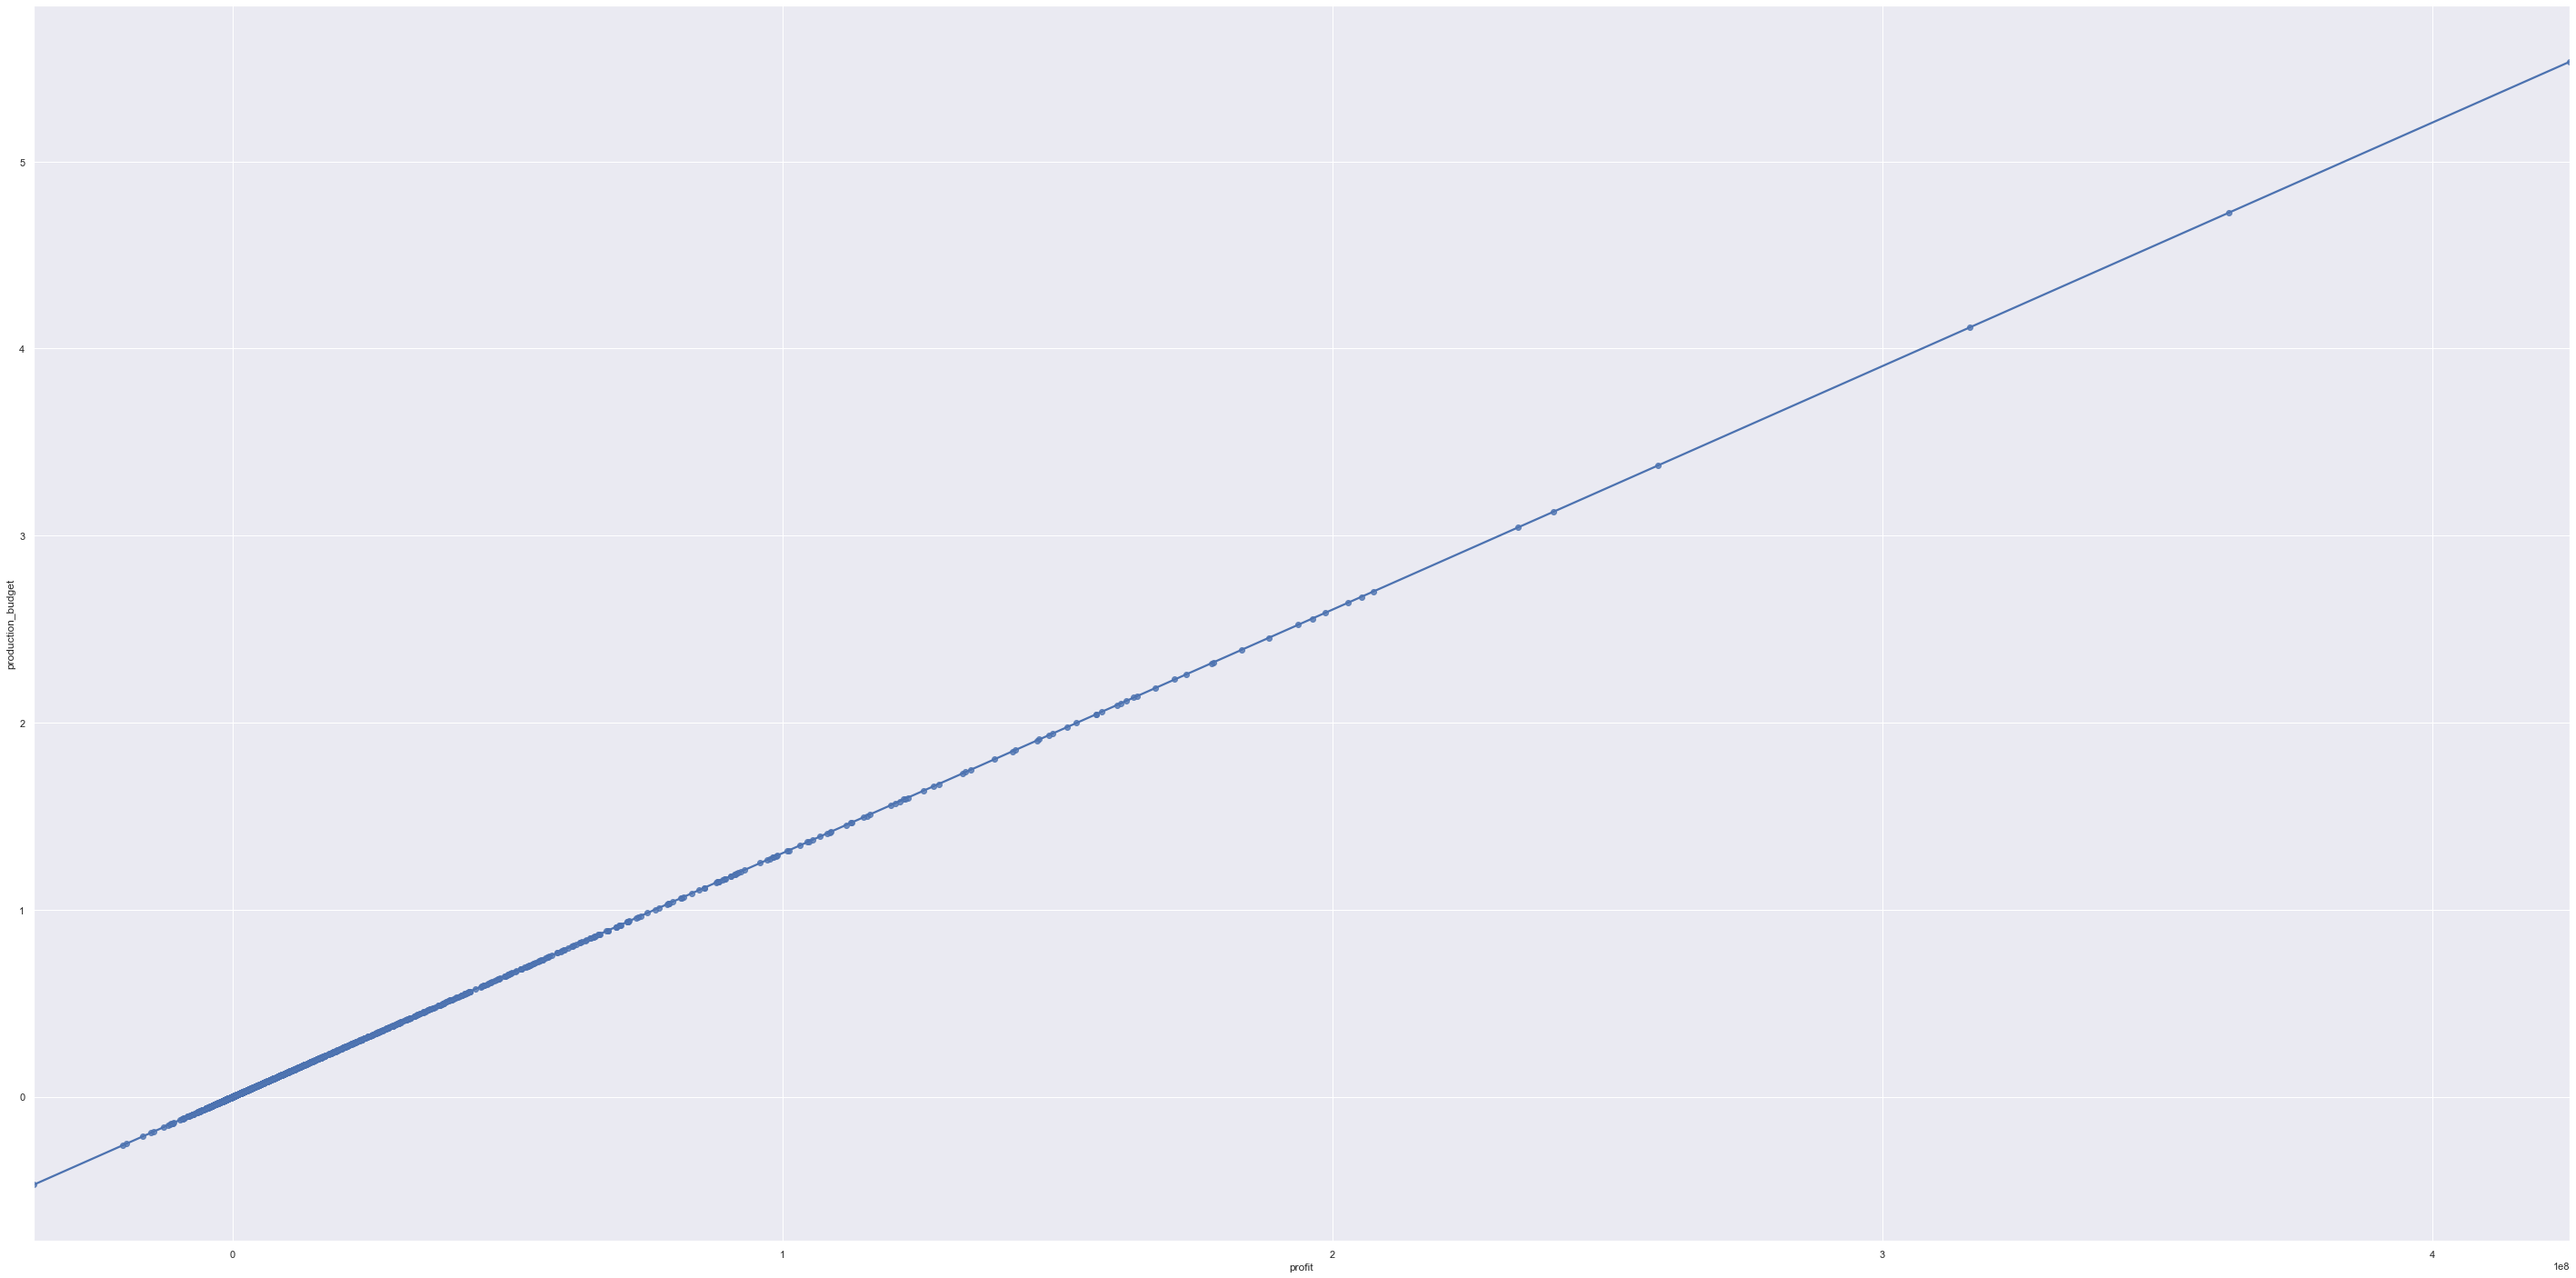

In [130]:
sns.regplot(joins['profit'], joins['production_budget'])
sns.set(rc={'figure.figsize':(50,25)})